In [6]:
from datasets import wine_white_dataset
wine_white = wine_white_dataset()

# Missing values



## Count rows that contain missing values

In [7]:
display(wine_white.isna().sum())

ID                       0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
flavanoids               0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                      12
magnesium                0
sulphates                0
alcohol                  0
lightness                0
quality                  0
dtype: int64

## Show rows with missing values

In [8]:
from datasets import show_mvs
show_mvs(wine_white)

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,magnesium,sulphates,alcohol,lightness,quality
75,76,7.4,0.24,0.29,10.1,0.050,0.38,21.0,105.0,0.9962,NaN,0.66,0.35,9.5,0.12,5
76,77,7.1,0.18,0.36,1.4,0.043,0.38,31.0,87.0,0.9898,NaN,0.92,0.37,12.7,0.09,7
77,78,7.0,0.32,0.34,1.3,0.042,0.38,20.0,69.0,0.9912,NaN,0.41,0.65,12.0,0.09,7
152,153,6.9,0.25,0.30,4.1,0.054,0.38,23.0,116.0,0.9940,NaN,0.35,0.38,9.4,0.13,6
263,264,7.2,0.29,0.40,13.6,0.045,0.38,66.0,231.0,0.9977,NaN,0.74,0.59,9.6,0.12,6
264,265,6.2,0.24,0.35,1.2,0.038,0.38,22.0,167.0,0.9912,NaN,0.06,0.48,10.6,0.10,6
330,331,6.4,0.32,0.35,4.8,0.030,0.38,34.0,101.0,0.9912,NaN,0.11,0.60,12.5,0.08,8
331,332,6.8,0.24,0.34,4.6,0.032,0.38,37.0,135.0,0.9927,NaN,0.24,0.39,10.6,0.10,5
439,440,6.2,0.35,0.04,1.2,0.060,0.38,23.0,108.0,0.9934,NaN,0.61,0.54,9.2,0.12,5
520,521,7.9,0.19,0.26,2.1,0.039,0.38,8.0,143.0,0.9942,NaN,0.21,0.74,9.8,0.11,5


- ### the missing ph values seem to be real/unexpected missing as all liquids have a ph value

-> We may have to generate values for the missing ones

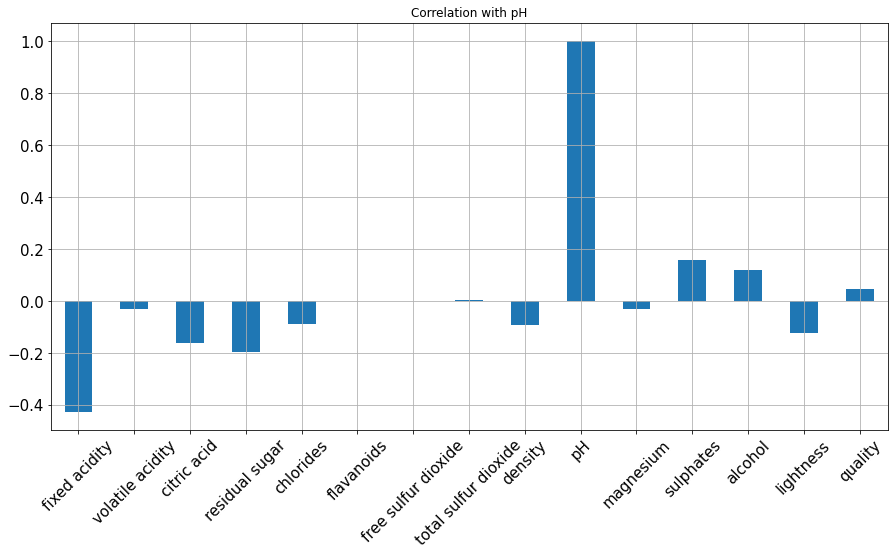

In [9]:
from datasets import plot_corr
plot_corr(wine_white.drop('ID', axis=1), 'pH', 'Correlation with pH')

### pH correlates negatively with fixed acidity. this makes sense from domain perspective. pH values seem to be missing at random because they can be approximately calculated from the fixed acidity feature

# Features scaling

In [10]:
wine_white.describe(include='all')

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,magnesium,sulphates,alcohol,lightness,quality
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4.896000e+03,4896.000000,4896.000000,4896.000000,4884.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,2449.753268,6.854851,0.278202,0.334252,6.389696,0.045763,3.800000e-01,35.311275,138.355699,0.994026,3.188323,0.499592,0.489871,10.514824,0.106442,5.937704
std,1414.099561,0.843839,0.100727,0.121000,5.072379,0.021841,4.674516e-14,17.009516,42.502662,0.002991,0.151079,0.286039,0.114142,1.230562,0.012677,2.473888
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,3.800000e-01,2.000000,9.000000,0.987110,2.720000,0.000000,0.220000,8.000000,0.070000,3.000000
25%,1225.750000,6.300000,0.210000,0.270000,1.700000,0.036000,3.800000e-01,23.000000,108.000000,0.991720,3.090000,0.260000,0.410000,9.500000,0.100000,5.000000
50%,2449.500000,6.800000,0.260000,0.320000,5.200000,0.043000,3.800000e-01,34.000000,134.000000,0.993735,3.180000,0.510000,0.470000,10.400000,0.110000,6.000000
75%,3674.250000,7.300000,0.320000,0.390000,9.900000,0.050000,3.800000e-01,46.000000,167.000000,0.996100,3.280000,0.740000,0.550000,11.400000,0.120000,6.000000
max,4898.000000,14.200000,1.100000,1.660000,65.800000,0.346000,3.800000e-01,289.000000,440.000000,1.038980,3.820000,1.000000,1.080000,14.200000,0.140000,99.000000


- => total sulfur dioxide has a high difference in the max value
- => free sulfur dioxide has a high difference in the max value
- => residual sugar has a high difference in the max value

## Normalization

### MinMax normalization is used when the distribution is not a bell curve

In [11]:
from sklearn import preprocessing
import pandas as pd
from datasets import get_logist_regression_score, normalize_feature

x = wine_white.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized score', score)

scaler = preprocessing.MinMaxScaler()
wine_white_normalized = pd.DataFrame(scaler.fit_transform(wine_white.drop('quality',axis=1)), columns=wine_white.columns.drop('quality'))
x = wine_white_normalized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('all features normalized score', score)


wine_white_normalized = normalize_feature(wine_white, 'total sulfur dioxide')
x = wine_white_normalized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('only total sulfur dioxide normalized score', score)

wine_white_normalized = normalize_feature(wine_white, 'residual sugar')
x = wine_white_normalized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('only residual sugar normalized score', score)

wine_white_normalized = normalize_feature(wine_white, 'total sulfur dioxide')
wine_white_normalized = normalize_feature(wine_white_normalized, 'free sulfur dioxide')
x = wine_white_normalized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('total sulfur dioxide + free sulfur dioxide normalized score', score)

wine_white_normalized = normalize_feature(wine_white, 'total sulfur dioxide')
wine_white_normalized = normalize_feature(wine_white_normalized, 'free sulfur dioxide')
wine_white_normalized = normalize_feature(wine_white_normalized, 'residual sugar')
x = wine_white_normalized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('total sulfur dioxide + free sulfur dioxide + residual sugar normalized score', score)

x = wine_white.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized without total sulfur dioxide score', score)

x = wine_white.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1).drop('free sulfur dioxide', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized without total sulfur dioxide without free sulfur dioxide score', score)

no features normalized score 0.4693042291950887
all features normalized score 0.5457025920873124
only total sulfur dioxide normalized score 0.8717598908594816
only residual sugar normalized score 0.6909959072305594
total sulfur dioxide + free sulfur dioxide normalized score 0.9481582537517054
total sulfur dioxide + free sulfur dioxide + residual sugar normalized score 0.9590723055934516
no features normalized without total sulfur dioxide score 0.8710777626193724
no features normalized without total sulfur dioxide without free sulfur dioxide score 0.951568894952251


total sulfur dioxide, free sulfur dioxide and residual sugar seem to have a scaling which does not work well with this dataset. We should either drop them or normalize them as shown above since the model score increases greatly

## Standardization

Standardization is an alternative scaling method and typically rescales data to have a specific mean and standard deviation of 1

In [12]:
from sklearn import preprocessing
import pandas as pd
from datasets import get_logist_regression_score, standardize_feature

x = wine_white.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized score', score)

scaler = preprocessing.StandardScaler()
wine_white_standardized = pd.DataFrame(scaler.fit_transform(wine_white.drop('quality',axis=1)), columns=wine_white.columns.drop('quality'))
x = wine_white_standardized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('all features standardized score', score)


wine_white_standardized = standardize_feature(wine_white, 'total sulfur dioxide')
x = wine_white_standardized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('only total sulfur dioxide standardized score', score)

wine_white_standardized = standardize_feature(wine_white, 'total sulfur dioxide')
wine_white_standardized = standardize_feature(wine_white_standardized, 'free sulfur dioxide')
x = wine_white_standardized.dropna().drop('ID', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('total sulfur dioxide + free sulfur dioxide standardized score', score)

x = wine_white.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized without total sulfur dioxide score', score)

x = wine_white.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1).drop('free sulfur dioxide', axis=1)
y = wine_white.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized without total sulfur dioxide without free sulfur dioxide score', score)

no features standardized score 0.4693042291950887
all features standardized score 0.5470668485675307
only total sulfur dioxide standardized score 0.8656207366984994
total sulfur dioxide + free sulfur dioxide standardized score 0.9536152796725784
no features standardized without total sulfur dioxide score 0.8710777626193724
no features standardized without total sulfur dioxide without free sulfur dioxide score 0.951568894952251


# Noise


In [13]:
#Excursus to ensemble learning
#Our noise filter additionally requires ensemble learning with a majority voting approach
#This is a general example for this approach
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_predict

# Define 3 classifiers
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# define data
x = wine_white.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_white.dropna()['quality']

# merge 3 classifiers into one voting classifier
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

# train voting classifier with k-fold method
y_pred = cross_val_predict(eclf1, x, y, cv=3)

# save predictions, original quality and correct prediction boolean in data frame
result = pd.DataFrame(y_pred, columns=['Prediction'])
result['quality'] = y
delta_treshold = 2.5
result['Correct Prediction']= abs(result['Prediction'] - result['quality']) < delta_treshold

display(result.shape)
display(result)

# select all incorrect predicted data
print('False predictions')
delta_result = result[result['Correct Prediction'] == False]
display(delta_result.shape)
display(delta_result)

(4884, 3)

,Prediction,quality,Correct Prediction
0,5,6.0,True
1,5,6.0,True
2,6,6.0,True
3,5,6.0,True
4,5,6.0,True
...,...,...,...
4879,6,6.0,True
4880,6,5.0,True
4881,6,6.0,True
4882,6,5.0,True


False predictions


(127, 3)

,Prediction,quality,Correct Prediction
75,6,NaN,False
76,5,NaN,False
77,6,NaN,False
80,5,17.0,False
152,5,NaN,False
...,...,...,...
4672,4,7.0,False
4731,3,6.0,False
4743,7,3.0,False
4772,7,4.0,False


# Outliers


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

wine_white_without_na = wine_white.dropna()
display(wine_white_without_na.shape)
X = wine_white_without_na.drop('ID', axis=1).drop('quality', axis=1)
y = wine_white_without_na['quality']


#Outlier Detection based on Isolation Forests
# identify outliers in the wine training dataset based on IsolationForest class and an assumed contamination of 0.1
# Why a contamination of 0.1?
iso = IsolationForest(contamination=0.1)
y_out = iso.fit_predict(X)

# build a mask to select all rows that are outliers (inlier=1, outlier=-1)
mask = y_out != 1
X_outliers, y_outliers = X[mask], y[mask]

# Inliers vs. Outliers
print("Inliers: ",X.shape[0]-X_outliers.shape[0],"Outliers:",X_outliers.shape[0])

display('Outliers data:', X_outliers)

(4884, 16)

Inliers:  4395 Outliers: 489


'Outliers data:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,magnesium,sulphates,alcohol,lightness
0,7.0,0.27,0.36,20.70,0.045,0.38,45.0,170.0,1.00100,3.00,0.46,0.45,8.8,0.13
14,8.3,0.42,0.62,19.25,0.040,0.38,41.0,172.0,1.00020,2.98,0.46,0.67,9.7,0.12
17,6.2,0.66,0.48,1.20,0.029,0.38,29.0,75.0,0.98920,3.33,0.53,0.39,12.8,0.09
20,6.2,0.66,0.48,1.20,0.029,0.38,29.0,75.0,0.98920,3.33,0.46,0.39,12.8,0.08
23,7.6,0.67,0.14,1.50,0.074,0.38,25.0,168.0,0.99370,3.05,0.92,0.51,9.3,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,5.3,0.60,0.34,1.40,0.031,0.38,3.0,60.0,0.98854,3.27,0.27,0.38,13.0,0.10
4875,5.9,0.54,0.00,0.80,0.032,0.38,12.0,82.0,0.99286,3.25,0.75,0.36,8.8,0.12
4881,4.9,0.47,0.17,1.90,0.035,0.38,60.0,148.0,0.98964,3.27,0.43,0.35,11.5,0.09
4885,6.2,0.41,0.22,1.90,0.023,0.38,5.0,56.0,0.98928,3.04,0.14,0.79,13.0,0.09
